#  Homework 5

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, March 2nd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Monte Carlo and Simulation Revisited
In Homework #2, we used simulation to compute the expected values of functions of random variables. That is, given a random variable $X$, defined over $\mathbb{R}$, distributed according to the pdf $f_X$, and given a real-valued function of $X$, $h(X)$, we approximated $\mathbb{E}[h(X)]$ as follows
$$
\mathbb{E}[h(X)] = \int_{\mathbb{R}} h(x)f_X(x) dx \approx \frac{1}{N} \sum_{i=1}^N h(X_i), \quad X_i \sim f_X
$$

Now, suppose that, instead of being given the distribution $f_X$ and $h(X)$, you were simply asked to evaluate the following complex integral:
$$
I=\int_{0}^{\infty} \frac{x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}}{2+(x-4)^2} \, dx 
$$
A clever way to apply our Monte Carlo techniques would be to split the integrand as $h(x)f_X(x)$, and then approximate the integral as we have done in Homework #2:
$$
I = \int_{0}^{\infty} h(x)\,f_X(x) dx  \approx \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i)$$ 
where the $X_i$'s are independently drawn from $f_X(x)$. 

We denote the approximation of the integral as follows
$$\hat{I} = \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i), \quad X_i \sim f_X.$$


### Part A:

Rewrite your integrand as a product of two functions, $h(x)g(x)$, which can then be expressed as $h(x)f_X(x)$, where $f_X$ is a pdf (you may use one of the splits we propose in Part B or create your own). Explain why your choice of $h$ is appropriate. Explain why your choice of $g$ is appropriate for creating a pdf $f_X$.

(**Hint:** think about what you would have to do do turn $g$ into a good pdf and $h$ into a function that can be evaluated at multiple samples from this pdf. Think about how to choose these two functions to make your Monte Carlo approximation of $I$ as accurate as possible.)

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
g = lambda x: x*np.exp(-x)
h = lambda x:(np.power(x,3)*np.sin(np.sqrt(np.log(x+1))))/(2+np.power(x-4,2))

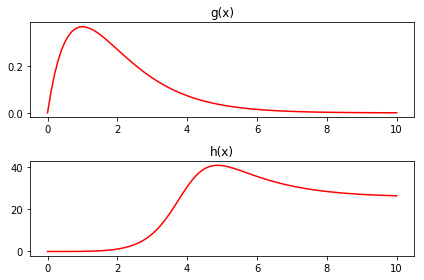

In [3]:
xx = np.linspace(0,10,100)

fig, axarr = plt.subplots(2)
                        

axarr[0].plot(xx,g(xx),'r')
axarr[0].set_title('g(x)')


axarr[1].plot(xx,h(xx),'r')
axarr[1].set_title('h(x)')
plt.tight_layout()
plt.show()

In [4]:
g = lambda x: 1.0/(2+np.power(x-4,2))
h = lambda x:(np.power(x,4)*np.sin(np.sqrt(np.log(x+1))))*np.exp(-x)

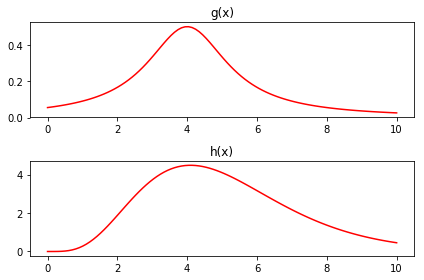

In [5]:
xx = np.linspace(0,10,100)

fig, axarr = plt.subplots(2)
                        

axarr[0].plot(xx,g(xx),'r')
axarr[0].set_title('g(x)')


axarr[1].plot(xx,h(xx),'r')
axarr[1].set_title('h(x)')
plt.tight_layout()
plt.show()

$h(x)=xe^{-x}$

$g(x)= \frac{x^3\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{(2+(x-4)^2)} $

This seems better, since $g(x)$ is close to a gamma distribution whose sum is equal to 1, defined in [0, inf].

### Part B:

In [278]:
from scipy.stats import gamma

def metropolis(p, qdraw, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples

def prop(x):
    return np.random.normal(x, 0.6)

# def metropolis_hastings(p,q, qdraw, nsamp, xinit):
#     samples=np.empty(nsamp)
#     x_prev = xinit
#     accepted=0
#     for i in xrange(nsamp):
#         x_star = qdraw(x_prev)
#         print x_star
#         if x_star == 0:
#             print x_prev, x_star, '===0'
            
#         p_star = p(x_star)
#         p_prev = p(x_prev)
#         pdfratio = p_star/p_prev
#         proposalratio = q(x_prev, x_star)/q(x_star, x_prev)
        
#         if np.random.uniform() < min(1, pdfratio*proposalratio):
#             samples[i] = x_star
#             x_prev = x_star
#             accepted +=1
#         else:#we always get a sample
#             samples[i]= x_prev
            
#     return samples, accepted

# t=10
# def gammapdf(x_new, x_old):
#     return gamma.pdf(x_new,x_old*t,scale=1/t)
# def gammadraw(x_old):
#     return gamma.rvs(x_old*t,scale=1/t)

- Use $\frac{1}{2+(x-4)^2}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].

In [309]:
nf = (np.pi/np.sqrt(2))
g = lambda x: 0 if x<0 else (1.0/(2+np.power(x-4,2)))/nf
h = lambda x: (np.power(x,4)*np.sin(np.sqrt(np.log(x+1))))*np.exp(-x)

In [312]:
means1 = np.empty(50)

for iter in xrange(50):
    x0=np.random.uniform()
    samps = metropolis(g, prop, 150000,x0)
    hs = h(samps)
    means1[iter] = np.mean(hs)
    print 'Iteration',iter, ': ',np.mean(hs)


Iteration 0 :  3.1022172756
Iteration 1 :  2.92700637236
Iteration 2 :  3.0897331421
Iteration 3 :  3.0209364541
Iteration 4 :  3.07646856942
Iteration 5 :  3.1302172592
Iteration 6 :  3.13618252864
Iteration 7 :  3.00629355807
Iteration 8 :  3.22785654677
Iteration 9 :  3.08353175684
Iteration 10 :  3.12042307901
Iteration 11 :  3.11647631417
Iteration 12 :  2.99913476584
Iteration 13 :  3.1387996303
Iteration 14 :  3.06631604252
Iteration 15 :  3.14412093005
Iteration 16 :  3.12947847166
Iteration 17 :  3.08329122424
Iteration 18 :  3.08035240544
Iteration 19 :  3.02429126008
Iteration 20 :  3.12627196421
Iteration 21 :  3.12019557629
Iteration 22 :  3.13604854459
Iteration 23 :  3.16101606982
Iteration 24 :  3.15179327225
Iteration 25 :  3.09706236611
Iteration 26 :  2.81523439167
Iteration 27 :  3.02720542577
Iteration 28 :  3.05470497249
Iteration 29 :  3.08059671069
Iteration 30 :  2.94859617547
Iteration 31 :  3.12411990287
Iteration 32 :  3.1127058013
Iteration 33 :  3.04130169

In [313]:
print 'Mean I: {:.4f}, Var(I): {:.4f}'.format(np.mean(means1*nf),np.var(means1*nf))


Mean I: 6.8310, Var(I): 0.0300


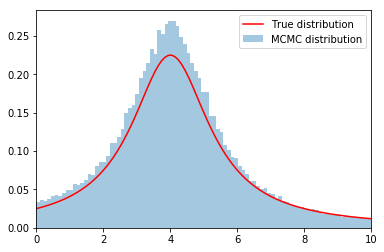

('starting point was ', 0.041942109413038886)


In [319]:
# plot our sample histogram
plt.hist(samps,bins=300, alpha=0.4, label=u'MCMC distribution', normed=True) 
xx= np.linspace(0,10,100)
plt.plot(xx, map(g, xx), 'r', label=u'True distribution') 
plt.legend()
plt.xlim([0,10])
plt.show()
print("starting point was ", x0)

- Use $xe^{-x}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].

In [ ]:
g2 = lambda x: x*np.exp(-x)
h2 = lambda x:(np.power(x,3)*np.sin(np.sqrt(np.log(x+1))))/(2+np.power(x-4,2))

In [315]:
means2 = np.empty(50)

for iter in xrange(50):
    x0=np.random.uniform()
    samps = metropolis(g2, prop, 150000,x0)
    hs = h2(samps)
    means2[iter] = np.mean(hs)
    print 'Iteration',iter, ': ',np.mean(hs)


Iteration 0 :  5.85285305753
Iteration 1 :  6.14614858083
Iteration 2 :  6.1892173723
Iteration 3 :  6.09122620391
Iteration 4 :  6.34022537187
Iteration 5 :  5.96540919785
Iteration 6 :  5.82075549915
Iteration 7 :  5.97428179378
Iteration 8 :  5.90704616002
Iteration 9 :  6.00020149428
Iteration 10 :  5.85850424022
Iteration 11 :  6.08509276604
Iteration 12 :  5.78977106791
Iteration 13 :  6.2306012509
Iteration 14 :  5.94294641143
Iteration 15 :  6.12801922042
Iteration 16 :  6.08429197523
Iteration 17 :  5.69686440897
Iteration 18 :  6.22165813357
Iteration 19 :  6.39850267838
Iteration 20 :  5.74414825037
Iteration 21 :  6.01796324633
Iteration 22 :  6.09117035465
Iteration 23 :  6.08138068158
Iteration 24 :  6.17363864254
Iteration 25 :  5.96241068693
Iteration 26 :  5.74201469268
Iteration 27 :  5.97396743263
Iteration 28 :  5.64084372157
Iteration 29 :  6.25780179822
Iteration 30 :  6.11368759815
Iteration 31 :  5.93281513148
Iteration 32 :  5.84262948826
Iteration 33 :  6.1560

In [317]:
print 'Mean I: {:.4f}, Var(I): {:.4f}'.format(np.mean(means2),np.var(means2))

Mean I: 6.0394, Var(I): 0.0361


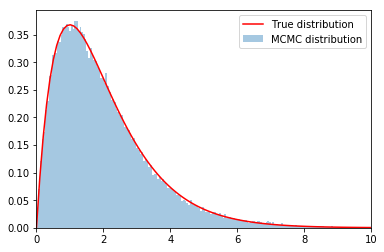

('starting point was ', 0.041942109413038886)


In [318]:
# plot our sample histogram
plt.hist(samps,bins=300, alpha=0.4, label=u'MCMC distribution', normed=True) 
xx= np.linspace(0,10,100)
plt.plot(xx, g2(xx), 'r', label=u'True distribution') 
plt.legend()
plt.xlim([0,10])
plt.show()
print("starting point was ", x0)

- Compare the variance of your two estimates. Which choice of $f_X$ is better? Explain why.

The second is better. The pdf in the first case looks a bit weird (f(x) is not close to the true distribution). It may be due to my implementation.

## Problem 2: Metropolis Algorithm

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you might not recall the correct order, but the mistakes you will tend to make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *The Godfather: Part II*
4. *The Dark Knight*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *The Godfather: Part II*
5. *Pulp Fiction*
4. *The Dark Knight*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Now, we have a way of quantifying how wrong your answer can be. We define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is the indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *The Dark Knight* is correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}.$$

### Part A:

Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?

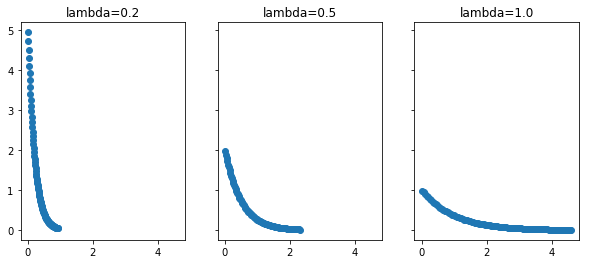

In [174]:
from scipy.stats import expon

ls = [0.2,0.5,1.0] # lambdas

f, axarr = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,4))
for i in xrange(len(ls)):
    x = np.linspace(expon.ppf(0.01, scale=ls[i]),expon.ppf(0.99, scale=ls[i]), 100)
    axarr[i].plot(x, expon.pdf(x, scale=ls[i]), 'o'); 
    axarr[i].set_title('lambda='+str(ls[i]))
plt.show()

In [180]:
def metropolis(p, qdraw, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted=0
    for i in xrange(nsamp[0]):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted+=1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

In [176]:
import functools

w = [1,2,3,4,5]

def dist(u,v):
    return np.sum([u[i]!=v[i] for i in xrange(len(u))])

f = lambda l,x : expon.pdf(dist(x,w), scale=l)

def prop_draw(ifrom):
    return np.random.permutation(ifrom)


In [207]:
import operator

exp = expon(scale=1)

init = [1,2,5,4,3]

ranks_by_lambda = {}
for l in ls:
    print '------------------- lambda', l
    samps, acc = metropolis(functools.partial(f,l), prop_draw, (500,5), init)
    ranks_by_lambda[l] = samps
    
    # ranking
    ranking = {}
    for samp in samps:
        key = np.array_str(samp)
        if ranking.has_key(key)==False:
            ranking[key]=0
        ranking[key]+=1
    ranking = sorted(ranking.items(), key=operator.itemgetter(1), reverse=True)
    for r in ranking[:5]:
        print r
    
    print '\n\n'
    


------------------- lambda 0.2
('[ 1.  2.  3.  4.  5.]', 430)
('[ 1.  3.  2.  4.  5.]', 32)
('[ 3.  2.  1.  4.  5.]', 19)
('[ 1.  2.  5.  4.  3.]', 15)
('[ 1.  2.  4.  3.  5.]', 4)



------------------- lambda 0.5
('[ 1.  2.  3.  4.  5.]', 369)
('[ 4.  2.  3.  1.  5.]', 53)
('[ 2.  1.  3.  4.  5.]', 22)
('[ 1.  4.  3.  2.  5.]', 18)
('[ 5.  2.  3.  1.  4.]', 11)



------------------- lambda 1.0
('[ 1.  2.  3.  4.  5.]', 270)
('[ 1.  4.  3.  2.  5.]', 24)
('[ 1.  3.  2.  4.  5.]', 16)
('[ 1.  2.  5.  4.  3.]', 14)
('[ 4.  2.  1.  3.  5.]', 14)





Thus, the trend is that smaller the lambda is smllaer the change from the correct answer.

### Part B:
Compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) by the Metropolis algorithm sampler. Compare the resulting probabilities for the various different $\lambda$ values. Summarize your findings.

In [223]:
for l, samps in ranks_by_lambda.iteritems():
    print '------------------- lambda', l

    # find The Shawshank Redemption
    count = len(filter(lambda x : 1 == int(x[0]), samps))
    print 'The Shawshank Redemption:', count/500.0


------------------- lambda 0.5
The Shawshank Redemption: 0.802
------------------- lambda 1.0
The Shawshank Redemption: 0.714
------------------- lambda 0.2
The Shawshank Redemption: 0.962
